In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import healpy as hp
from obiwan.qa.aaron_healpix import footprint_wSFD



In [4]:
Foot= footprint_wSFD('/home/kaylan/mydata')
sfd= Foot.get_footprint_object()


matching tiles to healpix centers


In [6]:
len(sfd.ipix_decals),len(sfd.ipix_mzls),len(sfd.ipix_des)

(860656, 437430, 92907)

In [5]:
temp= np.log10(sfd.temp)   
t_min,t_max= temp.min(),temp.max()
temp[sfd.ipix_mzls]= t_max + 0.1
temp[sfd.ipix_decals]= t_max + 0.2
temp[sfd.ipix_des]= t_max + 0.3

# define the bins and normalize
bounds = list(np.linspace(t_min,t_max,20)) + \
        [t_max+0.05,t_max+0.15,t_max+0.25]
bounds= np.array(bounds)

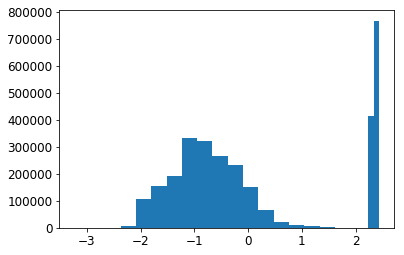

In [6]:
_=plt.hist(temp,bins=bounds)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


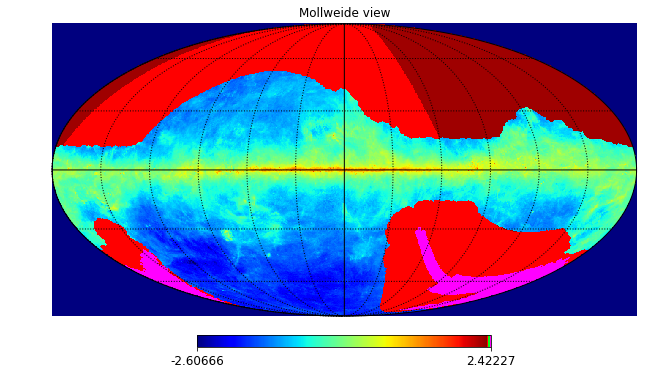

In [7]:
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[-1] = (1,0,1,1.0)
cmaplist[-2] = (0,1,0.1,1.0)
cmaplist[-3] = (1,0,0,1.0)
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cmap.set_over('w')
hp.mollview(temp,nest=True,cmap=cmap,
            flip='geo',unit='',max=t_max+0.24)                                         
hp.graticule(c='k',lw=1)  
#plt.savefig('footprint_almost.png',dpi=150)

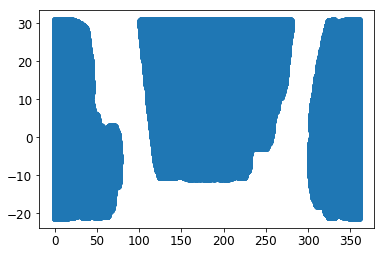

In [8]:
i= sfd.ipix_decals
plt.scatter(sfd.ra[i],sfd.dec[i])

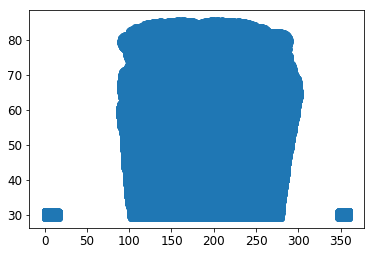

In [9]:
i= sfd.ipix_mzls
plt.scatter(sfd.ra[i],sfd.dec[i])

In [1]:
t_max

NameError: name 't_max' is not defined

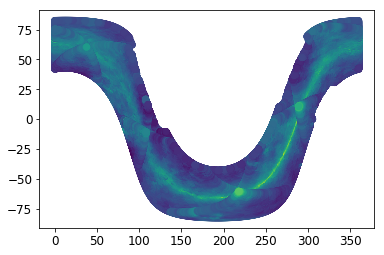

In [8]:
i= (temp <= t_max) & (sfd.b_indeg < 20.) & (sfd.b_indeg > -20)
plt.scatter(sfd.ra[i],sfd.dec[i],c=temp[i])

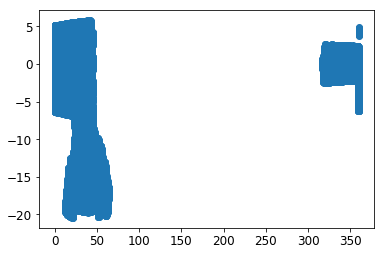

In [10]:
i= sfd.ipix_des
plt.scatter(sfd.ra[i],sfd.dec[i])

In [ ]:
def plot_one(survey):
    assert(survey in ['decals','mzls','des'])
    temp= np.log10(sfd.temp)   
    t_min,t_max= temp.min(),temp.max()
    temp[getattr(sfd,'ipix_%s' % survey)]= 5

    cmap = plt.cm.jet
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmaplist[-1] = (1,0,1,1.0)
    cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

    # define the bins and normalize
    bounds = list(np.linspace(t_min,t_max,20)) + [4.5,5.5]
    bounds= np.array(bounds)

    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    hp.mollview(temp,nest=True,cmap=cmap,
                flip='geo',unit='',max=0.8*t_max)                                         
    hp.graticule(c='k',lw=1) 
              
plot_one('decals')

In [ ]:
plot_one('mzls')

In [ ]:
plot_one('des')

In [ ]:
from astrometry.util.fits import fits_table, merge_tables
mzls= fits_table("/home/kaylan/mydata/svn_tiles/mosaic-tiles_obstatus.fits")
decals= fits_table("/home/kaylan/mydata/svn_tiles/decam-tiles_obstatus.fits")

In [ ]:
i= (mzls.in_desi_orig == 1) | (mzls.in_desi == 1)
plt.scatter(mzls.ra[i],mzls.dec[i])

In [ ]:
j= (decals.in_desi_orig == 1) | (decals.in_desi == 1)
i= (decals.in_des == 1) & (j)
plt.scatter(decals.ra[i],decals.dec[i])

In [ ]:
len(mzls[mzls.dec > 30]),len(decals)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# define the data
x = np.random.rand(100)
y = np.random.rand(100)
tag = np.arange(100)
tag[:10] = 0 # make sure there are some 0 values to showup as grey

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,30,31)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,500,20),
                  cmap=cmap, norm=norm)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

ax.set_title('Well defined discrete colors')
ax2.set_ylabel('Very custom cbar [-]', size=12)

In [ ]:
len(cmaplist)